In [64]:
import numpy as np
np.random.seed(45)
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data_path = r'C:\Users\DucTRung\Desktop\data_set\statistics'

In [66]:
df = pd.read_excel(data_path+'\\Population_variance_known_z_score.xlsx',index_col=2, header=9 )

In [67]:
df = df.drop(['Unnamed: 0'], axis=1).reset_index(drop=True)

# Confidence Intervals (CI). Population know, z-score
## Background: The population standard deviation is known to be 15K
## Task 1: Calculate the mean and the standard error
#### standard error (SE) = standard deviation (STD) / sqrt(n_sample)

In [68]:
df.mean()

Dataset    100200.366667
dtype: float64

In [69]:
df.std()

Dataset    11478.406127
dtype: float64

In [70]:
df.sem()

Dataset    2095.660653
dtype: float64

In [71]:
import math
15000 / math.sqrt(len(df['Dataset']))

2738.6127875258308

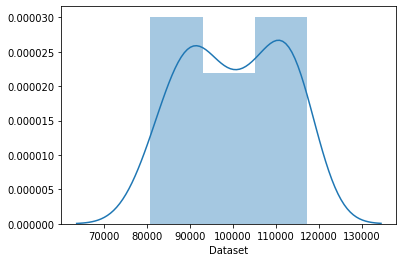

In [72]:
sns.distplot(df['Dataset'])

## Task 2: Find the appropriate z-score for calculating a 90% CI
### z_score = (xbar - Mean) / STD
### 90% CI => alpha = 0.1 => z(0.05) wil match value of 95% (1-0.05) => z(0.05) = 1.6 + 0.05 = 1.65

In [101]:
z_table = pd.read_excel(data_path+'\\The_z_table.xlsx', header=5, index_col=1).drop(['Unnamed: 0'], axis=1)
z_table

,0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
z,,,,,,,,,,
0.0,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.1,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.2,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.3,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.4,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.5,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.6,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.7,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.8,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133


## Task 3: Find the 90% CI
### CI = x_mean +(-) ME
### ME = z(alpha/2) * SE

In [106]:
ME = 1.65 * (15000 / math.sqrt(len(df['Dataset'])))

In [108]:
df.mean() - ME

Dataset    95681.655567
dtype: float64

In [109]:
df.mean() + ME

Dataset    104719.077766
dtype: float64

In [118]:
import scipy.stats as st
def confidence_interval(data, confidence):
    a = np.array(data)
    n = len(a)
    m = np.mean(a)
    se = st.sem(a)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [119]:
confidence_interval(df, .9)

(100200.36666666667, array([96639.57301231]), array([103761.16032102]))

# Confidence Intervals (CI). Population unknow, t-score

## Task 1: Calculate the mean and the standard error
#### standard error (SE) = standard deviation (STD) / sqrt(n_sample)

In [131]:
df = pd.read_excel(data_path+'\\Population_variance_unknown_t_score.xlsx', header=8).drop(["Unnamed: 0", 'Unnamed: 2'], axis=1)

In [132]:
df.mean()

Dataset    92533.333333
dtype: float64

In [133]:
df.sem()

Dataset    4643.962628
dtype: float64

In [134]:
confidence_interval(df, .99)

(92533.33333333333, array([76951.03996465]), array([108115.62670201]))

## Task 2: Determine which statistic to use for inference
1. Population variance is unknown
2. We have a small sample
3. We assume that the population is normally distributed
### =>The appropriate statistic to use is the t-statistic